# Setting up the environment

In this section, we import all the necessary libraries that will be used in this notebook. These include libraries for data manipulation, machine learning model creation, evaluation, and visualization.

In [16]:
# Import necessary libraries
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib  # For loading the saved model
import json
from sklearn.metrics import (
    ConfusionMatrixDisplay, 
    f1_score,
    classification_report,
    precision_recall_fscore_support,
    precision_score, 
    recall_score, 
    confusion_matrix, 
    accuracy_score
)
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

# Load Pre-Trained Model and Selected Features

The model and selected features are loaded from files in the `Models` folder.

In [17]:
model_file = 'Models/SB25rAll_n0.2_process_filt_xgb200_nf25_noMet_v1.joblib'
features_file = 'Models/SB25rAll_n0.2_process_filt_xgb200_nf25_noMet_v1.json'

In [18]:
# Load pre-trained model
if not os.path.exists(model_file):
    raise FileNotFoundError(f"Model file {model_file} not found.")
model = joblib.load(model_file)

In [19]:
# Load selected features
if not os.path.exists(features_file):
    raise FileNotFoundError(f"Features file {features_file} not found.")
with open(features_file, 'r') as f:
    selected_features = json.load(f)['features']

# Dataset Configuration

Set paths to input files.

In [20]:
dataset_name = 'SB25rAll'
reduction_method = '_n0.2_process_filt'
input_file = os.path.join('Data_Preparation/InputModel', f'{dataset_name}{reduction_method}.csv')
output_file = f'{dataset_name}{reduction_method}'

In [21]:
# Load data from CSV, raising an error if file is missing
if not os.path.exists(input_file):
    raise FileNotFoundError(f"Input file {input_file} not found.")
df = pd.read_csv(input_file)

In [22]:
print(df.columns)

Index(['FIELDID', 'Crop_type', 'Crop_num', 'Year', 'veg_mean_lai',
       'Irrigation', 'veg_std_ndvi', 's1_sigma_vv_linear', 'week_cos', 'week',
       'growth_rate_ndvi', 'veg_mean_msi', 'mean_combined_vegetation_index',
       'veg_std_evi', 's1_vv', 'veg_mean_ndvi', 'veg_mean_pvr', 's1_p_ratio',
       'veg_min_msi', 's1_sigma_vh_linear', 'veg_min_lai', 's1_vh',
       'veg_max_ndvi', 'veg_median_lai', 'veg_max_pvr', 'veg_median_ndvi',
       'veg_min_evi', 'veg_median_pvr', 'veg_std_msi', 'veg_mean_evi',
       'veg_std_lai', 'week_sin', 'veg_min_ndvi', 'ndvi_evi_ratio',
       'veg_min_pvr', 's1_angle', 's1_rvi', 'veg_median_msi', 'veg_max_lai',
       'growth_rate_lai', 'veg_median_evi', 'veg_std_pvr', 'veg_max_evi',
       'veg_max_msi', 'growth_rate_evi', 's1_rcspr'],
      dtype='object')


In [23]:
print(df["Crop_type"].value_counts())

Crop_type
Pasture       32824
Maize         24925
Tree          19733
Soy           19078
Lucern         9623
Sunflower      9116
Wheat          8688
Fallow         2759
Groundnuts      321
Sorghum         312
Name: count, dtype: int64


In [24]:
# Group by 'CATNAME_1' and display unique irrigation values for each category
type_num = df[['Crop_type', 'Crop_num']].drop_duplicates()

# Print the unique categories and their corresponding irrigation values ordered by Crop_num
print(type_num.sort_values(by='Crop_num'))

         Crop_type  Crop_num
1            Maize       0.0
8              Soy       1.0
6        Sunflower       2.0
7            Wheat       3.0
3           Lucern       4.0
5          Pasture       5.0
0             Tree       6.0
102004      Fallow       7.0
102037  Groundnuts       8.0
102031     Sorghum       9.0


In [25]:
# list columns
print(df.columns)

Index(['FIELDID', 'Crop_type', 'Crop_num', 'Year', 'veg_mean_lai',
       'Irrigation', 'veg_std_ndvi', 's1_sigma_vv_linear', 'week_cos', 'week',
       'growth_rate_ndvi', 'veg_mean_msi', 'mean_combined_vegetation_index',
       'veg_std_evi', 's1_vv', 'veg_mean_ndvi', 'veg_mean_pvr', 's1_p_ratio',
       'veg_min_msi', 's1_sigma_vh_linear', 'veg_min_lai', 's1_vh',
       'veg_max_ndvi', 'veg_median_lai', 'veg_max_pvr', 'veg_median_ndvi',
       'veg_min_evi', 'veg_median_pvr', 'veg_std_msi', 'veg_mean_evi',
       'veg_std_lai', 'week_sin', 'veg_min_ndvi', 'ndvi_evi_ratio',
       'veg_min_pvr', 's1_angle', 's1_rvi', 'veg_median_msi', 'veg_max_lai',
       'growth_rate_lai', 'veg_median_evi', 'veg_std_pvr', 'veg_max_evi',
       'veg_max_msi', 'growth_rate_evi', 's1_rcspr'],
      dtype='object')


# Using Full Dataset for Model Evaluation

Fit the model on the entire dataset and calculate metrics without splitting the data.

In [26]:
X = df[selected_features]
y = df["Crop_num"]

# Using the full dataset for training and evaluation
# model.fit(X, y)
y_pred = model.predict(X)

# Calculate Metrics

Define a function to calculate model performance metrics including RMSE, R², and MAE.

In [27]:
# Train-Test Split
test_size = 0.25
random_state = 18
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
# model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

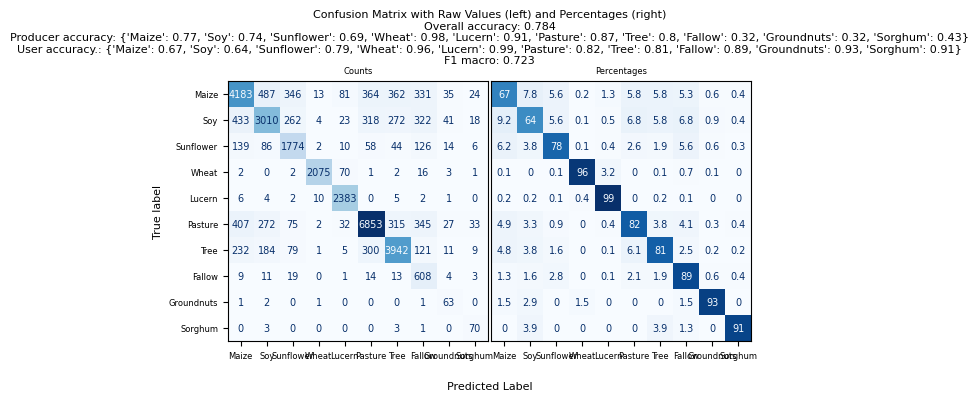

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Define crop types for classification report
crop_type_names = ['Maize', 'Soy', 'Sunflower', 'Wheat', 'Lucern', 'Pasture', 'Tree', 'Fallow', 'Groundnuts', 'Sorghum']
# Classification Report
class_report = classification_report(y_test, y_pred, target_names=crop_type_names)
# Map numerical labels to crop names
crop_name_mapping = dict(zip(df['Crop_num'].unique(), df['Crop_type'].unique()))

# Normalize confusion matrix to percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_normalized = np.around(cm_normalized, decimals=1)  # Round to 1 decimal place

# Calculate precision, recall, and f1-score for each class
precision, recall, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Ensure that overall accuracy, producer, and user accuracy are computed correctly
overall_acc = np.mean(y_test == y_pred)



# Create figure with two subplots and reduce space manually between them
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

# Adjust the aspect ratio of the matrices to make them more compact
ax1.set_aspect(1.0 / ax1.get_data_ratio() * 0.8)
ax2.set_aspect(1.0 / ax2.get_data_ratio() * 0.8)

# Plot raw confusion matrix on the left
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[crop_name_mapping[label] for label in np.unique(y)])
disp1.plot(ax=ax1, cmap='Blues', colorbar=False)
ax1.set_title('Counts', fontsize=6)
ax1.set_ylabel('True label', fontsize=8)  # Keep y-axis label on the first matrix
ax1.tick_params(axis='x', labelsize=6)
ax1.tick_params(axis='y', labelsize=6)

# Remove the automatically set x-axis label for ax1
ax1.set_xlabel('')

# Reduce font size for numbers inside the confusion matrix
for text in ax1.texts:
    text.set_fontsize(7)

# Plot normalized confusion matrix (percentages) on the right
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[crop_name_mapping[label] for label in np.unique(y)])
disp2.plot(ax=ax2, cmap='Blues', colorbar=False)
ax2.set_title('Percentages', fontsize=6)
ax2.set_ylabel('')  # Remove y-axis label on the second matrix
ax2.tick_params(axis='x', labelsize=6)
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove y-axis ticks

# Remove the automatically set x-axis label for ax2
ax2.set_xlabel('')

# Reduce font size for numbers inside the normalized confusion matrix
for text in ax2.texts:
    text.set_fontsize(7)

# Adjust margins manually to remove space between the two subplots and give room for the x-axis label
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.15, wspace=-0.3)  # Increased bottom to 0.15 for space

# Add a common x-axis label closer to the bottom of the matrices
fig.text(0.5, 0.03, 'Predicted Label', ha='center', fontsize=8)  # Adjusted y value (0.03) to bring label closer

# Add a single title for both plots with reduced font size
fig.suptitle(
    'Confusion Matrix with Raw Values (left) and Percentages (right)\n'
    f'Overall accuracy: {overall_acc:.3f}\n'
    f'Producer accuracy: {dict(zip([crop_name_mapping[label] for label in np.unique(y_test)], np.around(precision, 2)))}\n'
    f'User accuracy.: {dict(zip([crop_name_mapping[label] for label in np.unique(y_test)], np.around(recall, 2)))}\n'
    f'F1 macro: {np.mean(f1_macro):.3f}', 
    fontsize=8
)

plt.show()



In [29]:
# Save Classification Results
results_df = pd.DataFrame({
    'True_Crop_Type': pd.concat([y_train, y_test], axis=0).reset_index(drop=True),
    'Predicted_Crop_Type': np.concatenate([model.predict(X_train), y_pred]),
    'FIELDID': df.loc[X_train.index.tolist() + X_test.index.tolist(), 'FIELDID'].reset_index(drop=True),
    'Year': df.loc[X_train.index.tolist() + X_test.index.tolist(), 'Year'].reset_index(drop=True),
    'Week': df.loc[X_train.index.tolist() + X_test.index.tolist(), 'week'].reset_index(drop=True),
    'Data_Type': ['Training'] * len(y_train) + ['Validation'] * len(y_pred)
})

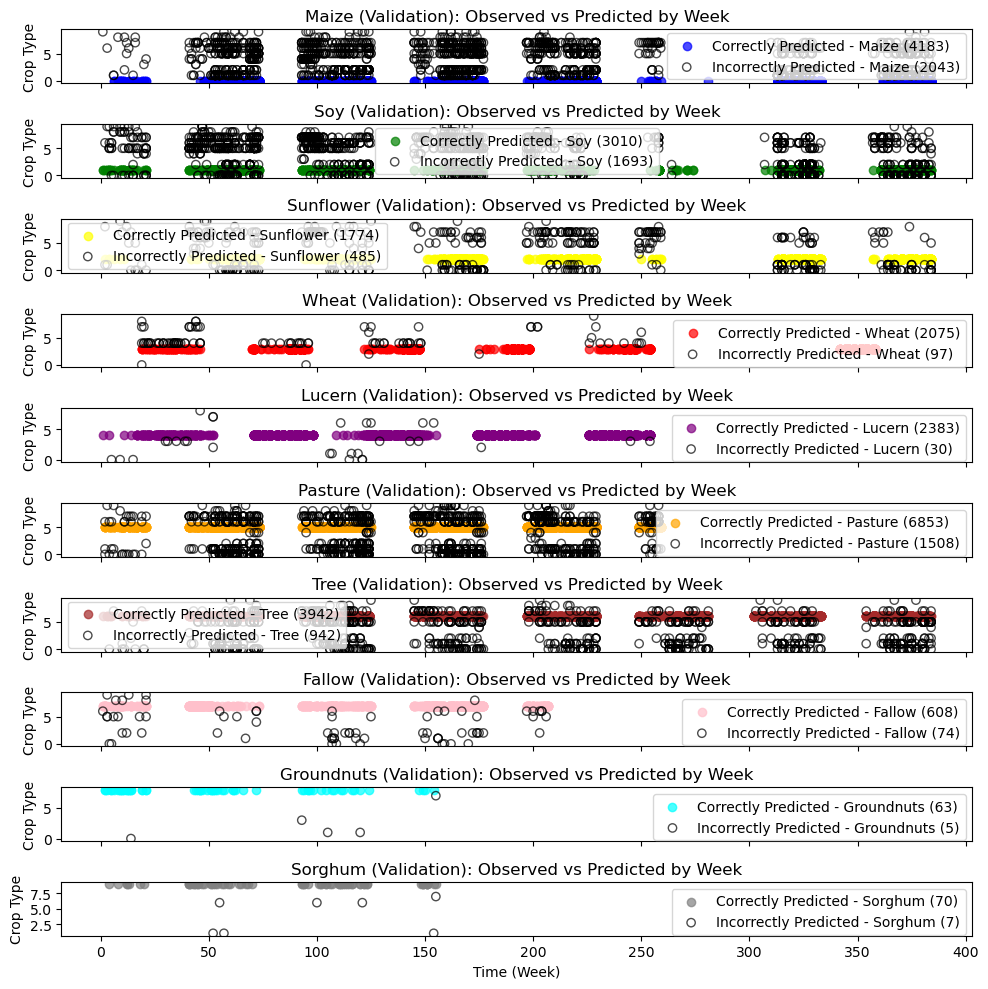

In [30]:
# Define colors for different crop types for the observed values
crop_colors = {
    0: 'blue',      # Maize
    1: 'green',     # Soy
    2: 'yellow',    # Sunflower
    3: 'red',       # Wheat
    4: 'purple',     # Lucern
    5: 'orange',     # Pasture
    6: 'brown' ,     # Tree
    7: 'pink',      # Fallow
    8: 'cyan',      # Groundnuts
    9: 'gray'       # Sorghum
}

# Filter only validation data
validation_data = results_df[results_df['Data_Type'] == 'Validation']

# Create 5 subplots for 5 crops
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 10), sharex=True)

# Crop names for subplots
crop_names = ['Maize', 'Soy', 'Sunflower', 'Wheat', 'Lucern', 'Pasture', 'Tree', 'Fallow', 'Groundnuts', 'Sorghum']

# Loop through each crop type and create a scatter plot for observed vs. predicted
for i, crop in enumerate(range(10)):
    # Filter data for the current crop type and only validation rows
    crop_data = validation_data[validation_data['True_Crop_Type'] == crop]
    
    # Identify correctly predicted points
    correct_predictions = crop_data[crop_data['True_Crop_Type'] == crop_data['Predicted_Crop_Type']]
    incorrect_predictions = crop_data[crop_data['True_Crop_Type'] != crop_data['Predicted_Crop_Type']]

    # Scatter plot for observed values (True Crop Type) - using crop-specific colors for correctly predicted points
    axes[i].scatter(correct_predictions['Week'] + (correct_predictions['Year'] - correct_predictions['Year'].min()) * 52, 
                    correct_predictions['True_Crop_Type'], 
                    color=crop_colors[crop], 
                    alpha=0.7, 
                    label=f'Correctly Predicted - {crop_names[crop]} ({len(correct_predictions)})',
                    marker='o')

    # Scatter plot for incorrectly predicted values - using empty black circles
    axes[i].scatter(incorrect_predictions['Week'] + (incorrect_predictions['Year'] - incorrect_predictions['Year'].min()) * 52, 
                    incorrect_predictions['Predicted_Crop_Type'], 
                    edgecolor='black', 
                    facecolor='none',  # empty circle
                    alpha=0.7, 
                    label=f'Incorrectly Predicted - {crop_names[crop]} ({len(incorrect_predictions)})',
                    marker='o')

    # Set labels and title for each subplot
    axes[i].set_title(f'{crop_names[crop]} (Validation): Observed vs Predicted by Week')
    axes[i].set_ylabel('Crop Type')
    axes[i].legend()

# Common labels
axes[-1].set_xlabel('Time (Week)')

# Adjust layout
plt.tight_layout()

# # Save the plot
# plt.savefig(os.path.join(output_folder_figures, output_file + "_validation_observed_vs_predicted_with_counts.png"), dpi=300, bbox_inches="tight")


# Plotting Feature Importance

We plot the feature importance of the final model using the features selected during the previous training process.

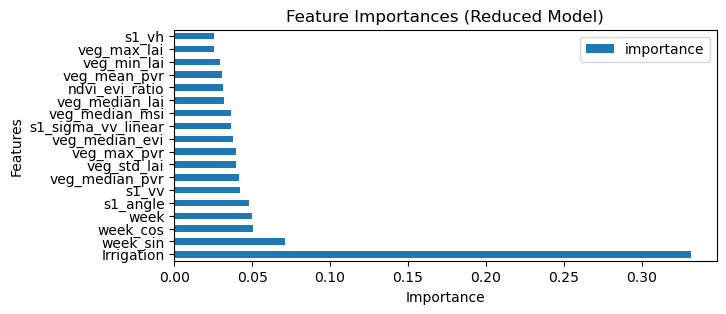

In [31]:

predictors2 = selected_features


feature_importances_final = pd.DataFrame(
    model.feature_importances_,
    index=predictors2,
    columns=['importance']
).sort_values('importance', ascending=False)

fig, ax = plt.subplots(figsize=(7, 3))
feature_importances_final.plot(kind='barh', ax=ax)
ax.set_title('Feature Importances (Reduced Model)')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')

plt.show()


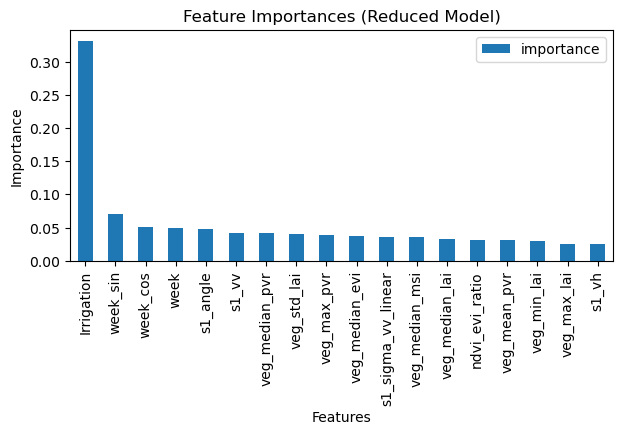

In [32]:
# Plot and save feature importance vertically
fig, ax = plt.subplots(figsize=(7, 3))
feature_importances_final.plot(kind='bar', ax=ax)
ax.set_title('Feature Importances (Reduced Model)')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')

plt.show()